Homework Options:

 √ 1) data structure of the doc
 
   2) generate random data to some shape and try. or bring your own data sets to try

In [117]:
# standard set of imports:

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import seaborn as sns

%matplotlib inline

In [118]:
data = np.random.rand(4, 3)
locs = ['IA', 'IL', 'IN']
times = pd.date_range('2000-01-01', periods=4)
foo = xr.DataArray(data, coords=[times, locs], dims=['time', 'space'])
foo

<xarray.DataArray (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [119]:
xr.DataArray(data)

<xarray.DataArray (dim_0: 4, dim_1: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Dimensions without coordinates: dim_0, dim_1

In [120]:
xr.DataArray(data, coords=[('time', times), ('space', locs)])

<xarray.DataArray (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [121]:
xr.DataArray(
    data,
    coords={
        'time': times,
        'space': locs,
        'const': 42,
        'ranking': ('space', [1, 2, 3]),
    },
    dims=['time', 'space'],
)

<xarray.DataArray (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (space) int32 1 2 3

In [122]:
xr.DataArray(
    data,
    coords={
        'time': times,
        'space': locs,
        'const': 42,
        'ranking': (('time', 'space'), np.arange(12).reshape(4, 3)),
    },
    dims=['time', 'space'],
)

<xarray.DataArray (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    const    int32 42
    ranking  (time, space) int32 0 1 2 3 4 5 6 7 8 9 10 11

In [123]:
df = pd.DataFrame({'x':[0, 1], 'y': [2, 3]}, index=['a', 'b'])
df.index.name = 'abc'
df.columns.name = 'xyz'
df

xyz,x,y
abc,,
a,0,2
b,1,3


In [124]:
xr.DataArray(df)

<xarray.DataArray (abc: 2, xyz: 2)>
array([[0, 2],
       [1, 3]], dtype=int64)
Coordinates:
  * abc      (abc) object 'a' 'b'
  * xyz      (xyz) object 'x' 'y'

In [125]:
foo.values

array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])

In [126]:
foo.dims

('time', 'space')

In [127]:
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [128]:
foo.attrs

{}

In [129]:
print(foo.name)

None


In [130]:
foo.values = 1.0 * foo.values

In [131]:
foo.name = 'foo'
foo.attrs['units'] = 'meters'
foo

<xarray.DataArray 'foo' (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [132]:
foo.rename('bar')

<xarray.DataArray 'bar' (time: 4, space: 3)>
array([[0.12268085, 0.16579594, 0.39129531],
       [0.53372893, 0.53723461, 0.87293778],
       [0.2316278 , 0.69431305, 0.09366512],
       [0.2581096 , 0.41780884, 0.07468638]])
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Attributes:
    units:    meters

In [133]:
foo.coords['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [134]:
foo['time']

<xarray.DataArray 'time' (time: 4)>
array(['2000-01-01T00:00:00.000000000', '2000-01-02T00:00:00.000000000',
       '2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04

In [135]:
foo['ranking'] = ('space', [1, 2, 3])
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
    ranking  (space) int32 1 2 3

In [136]:
del foo['ranking']
foo.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'

In [137]:
temp = 15 + 8 * np.random.randn(2, 2, 3)
precip = 10 * np.random.rand(2, 2, 3)
lon = [[-99.83, -99.32], [-99.79, -99.23]]
lat = [[42.25, 42.21], [42.63, 42.59]]

In [138]:
ds = xr.Dataset(
    {
        'temperature': (['x', 'y', 'time'], temp),
        'precipitation': (['x', 'y', 'time'], precip),
    },
    coords={
        'lon': (['x', 'y'], lon),
        'lat': (['x', 'y'], lat),
        'time': pd.date_range('2014-09-06', periods=3),
        'reference_time': pd.Timestamp('2014-09-05'),
    },
)
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 25.53 18.86 18.21 ... 33.97 3.687 25.13
    precipitation   (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [139]:
xr.Dataset(dict(bar=foo))

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) <U2 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.1227 0.1658 0.3913 ... 0.4178 0.07469

In [140]:
xr.Dataset(dict(bar=foo.to_pandas()))

<xarray.Dataset>
Dimensions:  (time: 4, space: 3)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 2000-01-02 2000-01-03 2000-01-04
  * space    (space) object 'IA' 'IL' 'IN'
Data variables:
    bar      (time, space) float64 0.1227 0.1658 0.3913 ... 0.4178 0.07469

In [141]:
'temperature' in ds

True

In [142]:
ds['temperature']

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[25.53305355, 18.86181614, 18.21148848],
        [11.35632267, 26.99092247, 11.44613394]],

       [[21.57706115, 10.17429903, 20.20886917],
        [33.97400169,  3.68710165, 25.13002773]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [143]:
ds.data_vars

Data variables:
    temperature    (x, y, time) float64 25.53 18.86 18.21 ... 33.97 3.687 25.13
    precipitation  (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [144]:
ds.coords

Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05

In [145]:
ds.attrs

{}

In [146]:
ds.attrs['title'] = 'example attribute'

In [147]:
ds

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 25.53 18.86 18.21 ... 33.97 3.687 25.13
    precipitation   (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255
Attributes:
    title:    example attribute

In [148]:
ds.temperature

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[25.53305355, 18.86181614, 18.21148848],
        [11.35632267, 26.99092247, 11.44613394]],

       [[21.57706115, 10.17429903, 20.20886917],
        [33.97400169,  3.68710165, 25.13002773]]])
Coordinates:
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    lat             (x, y) float64 42.25 42.21 42.63 42.59
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y

In [149]:
ds = xr.Dataset()
ds['temperature'] = (('x', 'y', 'time'), temp)
ds['temperature_double'] = (('x', 'y', 'time'), temp * 2)
ds['precipitation'] = (('x', 'y', 'time'), precip)
ds.coords['lat'] = (('x', 'y'), lat)
ds.coords['lon'] = (('x', 'y'), lon)
ds.coords['time'] = pd.date_range('2014-09-06', periods=3)
ds.coords['reference_time'] = pd.Timestamp('2014-09-05')

In [150]:
ds

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26
    precipitation       (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [151]:
ds[['temperature']]

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature     (x, y, time) float64 25.53 18.86 18.21 ... 33.97 3.687 25.13

In [152]:
ds[['temperature', 'temperature_double']]

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26

In [153]:
ds.drop_vars('temperature')

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26
    precipitation       (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [154]:
ds.drop_dims('time')

<xarray.Dataset>
Dimensions:         (x: 2, y: 2)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time  datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [155]:
ds.assign(temperature2=2 * ds.temperature)

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26
    precipitation       (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255
    temperature2        (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26

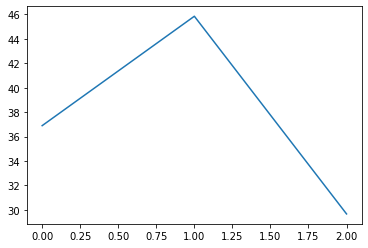

In [156]:
plt.plot((2 * ds.temperature.sel(x=0)).mean('y'))

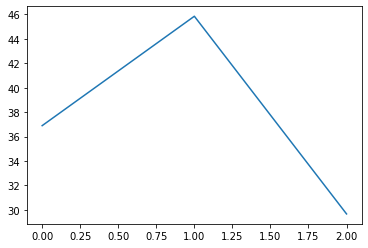

In [157]:
(ds.temperature.sel(x=0).pipe(lambda x: 2 * x).mean('y').pipe(plt.plot))

In [158]:
ds.rename({'temperature': 'temp', 'precipitation': 'precip'})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
Dimensions without coordinates: x, y
Data variables:
    temp                (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26
    precip              (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [159]:
ds.coords['day'] = ('time', [6, 7, 8])
ds.swap_dims({'time': 'day'})

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, day: 3)
Coordinates:
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    time                (day) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
  * day                 (day) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, day) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, day) float64 51.07 37.72 36.42 ... 7.374 50.26
    precipitation       (x, y, day) float64 0.8086 5.765 0.4066 ... 1.265 8.255

In [160]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

In [161]:
ds.reset_coords()

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y
Data variables:
    temperature         (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26
    precipitation       (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8

In [162]:
ds.set_coords(['temperature', 'precipitation'])

<xarray.Dataset>
Dimensions:             (x: 2, y: 2, time: 3)
Coordinates:
    temperature         (x, y, time) float64 25.53 18.86 18.21 ... 3.687 25.13
    precipitation       (x, y, time) float64 0.8086 5.765 0.4066 ... 1.265 8.255
    lat                 (x, y) float64 42.25 42.21 42.63 42.59
    lon                 (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time                (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time      datetime64[ns] 2014-09-05
    day                 (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    temperature_double  (x, y, time) float64 51.07 37.72 36.42 ... 7.374 50.26

In [163]:
ds.coords

Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8

In [164]:
ds['temperature'].reset_coords(drop=True)

<xarray.DataArray 'temperature' (x: 2, y: 2, time: 3)>
array([[[25.53305355, 18.86181614, 18.21148848],
        [11.35632267, 26.99092247, 11.44613394]],

       [[21.57706115, 10.17429903, 20.20886917],
        [33.97400169,  3.68710165, 25.13002773]]])
Coordinates:
  * time     (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
Dimensions without coordinates: x, y

In [165]:
ds.coords.to_dataset()

<xarray.Dataset>
Dimensions:         (x: 2, y: 2, time: 3)
Coordinates:
    lat             (x, y) float64 42.25 42.21 42.63 42.59
    lon             (x, y) float64 -99.83 -99.32 -99.79 -99.23
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
Dimensions without coordinates: x, y
Data variables:
    *empty*

In [166]:
alt = xr.Dataset(coords={'z': [10], 'lat': 0, 'lon': 0})
ds.coords.merge(alt.coords)

<xarray.Dataset>
Dimensions:         (time: 3, z: 1)
Coordinates:
  * time            (time) datetime64[ns] 2014-09-06 2014-09-07 2014-09-08
    reference_time  datetime64[ns] 2014-09-05
    day             (time) int32 6 7 8
  * z               (z) int32 10
Data variables:
    *empty*

In [167]:
ds['time'].to_index()

DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [168]:
ds.indexes

time: DatetimeIndex(['2014-09-06', '2014-09-07', '2014-09-08'], dtype='datetime64[ns]', name='time', freq='D')

In [172]:
midx = pd.MultiIndex.from_arrays(
    [['R', 'R', 'V', 'V'], [0.1, 0.2, 0.7, 0.9]], names=('band', 'wn')
)

In [173]:
mda = xr.DataArray(np.random.rand(4), coords={'spec': midx}, dims='spec')

In [174]:
mda

<xarray.DataArray (spec: 4)>
array([0.05524101, 0.10400514, 0.22939641, 0.81583827])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [175]:
mda['band']

<xarray.DataArray 'band' (spec: 4)>
array(['R', 'R', 'V', 'V'], dtype=object)
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9

In [176]:
mda.wn

<xarray.DataArray 'wn' (spec: 4)>
array([0.1, 0.2, 0.7, 0.9])
Coordinates:
  * spec     (spec) MultiIndex
  - band     (spec) object 'R' 'R' 'V' 'V'
  - wn       (spec) float64 0.1 0.2 0.7 0.9